In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bird-strike/Bird Strikes data.csv


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bird_strikes_data_df = pd.read_csv('/kaggle/input/bird-strike/Bird Strikes data.csv')

In [4]:
bird_strikes_data_df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,25-07-2001 00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,14-09-2001 00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,23-06-2003 00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,30-12-2011 00:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,30-12-2011 00:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,31-12-2011 00:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


# **Data Cleaning**

In [5]:
bird_strikes_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [6]:
bird_strikes_data_df.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,25558.000000,25558.000000,25558.000000
mean,253916.085609,2.691525,0.001056
std,38510.453382,12.793975,0.050420
min,1195.000000,1.000000,0.000000
25%,225783.750000,1.000000,0.000000
50%,248749.000000,1.000000,0.000000
75%,269168.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


In [7]:
bird_strikes_data_df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [8]:
bird_strikes_data_df.shape

(25558, 26)

In [9]:
bird_strikes_data_df.head(10)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,25-07-2001 00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,14-09-2001 00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,23-06-2003 00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
5,218432,Airplane,GUAYAQUIL/S BOLIVAR,< 1000 ft,A-300,Over 100,537,NaN,24-07-2003 00:00,No damage,...,False,NO DMG. BIRD REMAINS ON F/O WINDSCREEN.,Small,No Cloud,Unknown bird - small,N,0,0,0,No
6,221697,Airplane,NEW CASTLE COUNTY,< 1000 ft,LEARJET-25,Over 100,227,Other,17-08-2003 00:00,Caused damage,...,True,NaN,Small,No Cloud,European starling,N,"14,81,711",150,0,No
7,236635,Airplane,WASHINGTON DULLES INTL ARPT,< 1000 ft,A-320,Over 100,320,Other,01-03-2006 00:00,Caused damage,...,False,WS ASSISTED IN CLEAN-UP OF 273 STARLINGS AND 1...,Small,Some Cloud,European starling,Y,"14,83,141",100,0,No
8,207369,Airplane,ATLANTA INTL,< 1000 ft,DC-9-30,2 to 10,9,Aborted Take-off,06-01-2000 00:00,No damage,...,False,NaN,Small,Some Cloud,Rock pigeon,N,0,0,0,No
9,204371,Airplane,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,A-330,2 to 10,4,NaN,07-01-2000 00:00,No damage,...,False,FLT 057,Small,Some Cloud,Unknown bird - small,N,0,0,0,No


In [10]:
bird_strikes_data_df.tail(10)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
25548,319663,Airplane,GREATER ROCKFORD,< 1000 ft,A-300,1,1,NaN,27-12-2011 00:00,No damage,...,False,PILOT REPTD STRIKE TO BELOW THE WINDSCREEN ON ...,Medium,No Cloud,Unknown bird - medium,N,0,0,0,No
25549,319644,Airplane,BELLINGHAM INTL,< 1000 ft,MD-83,1,1,NaN,28-12-2011 00:00,No damage,...,False,NaN,Small,Overcast,Killdeer,N,0,0,0,No
25550,319668,Airplane,BALTIMORE WASH INTL,< 1000 ft,B-737-700,1,1,NaN,28-12-2011 00:00,No damage,...,False,NaN,Small,No Cloud,Unknown bird - small,Y,0,0,0,Yes
25551,319671,Airplane,BELLINGHAM INTL,< 1000 ft,MD-83,1,1,NaN,29-12-2011 00:00,No damage,...,False,NO DMG TO A/C. POSSIBLY GULL?,Small,Some Cloud,Unknown bird - small,N,0,50,0,No
25552,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,NaN,29-12-2011 00:00,No damage,...,True,ID BY SMITHSONIAN. SAMPLES FROM BOTH A/C AND B...,Medium,No Cloud,Mallard,Y,0,10,0,Yes
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,30-12-2011 00:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,30-12-2011 00:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,31-12-2011 00:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes
25557,319593,Airplane,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,1,1,NaN,31-12-2011 00:00,Caused damage,...,False,"HIT CENTER OF RADOME, CAVING IN ABOUT 12"". RAD...",Medium,No Cloud,Red-tailed hawk,N,0,0,0,Yes


In [11]:
bird_strikes_data_df.columns = bird_strikes_data_df.columns.str.strip().str.replace(' ', '_').str.replace(':', '').str.lower()

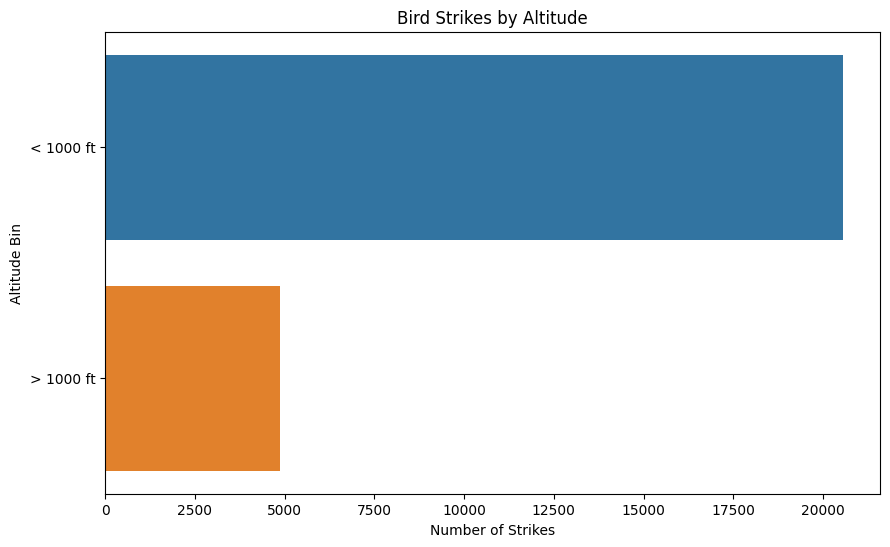

In [12]:
strikes_by_altitude = bird_strikes_data_df['altitude_bin'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=strikes_by_altitude.values, y=strikes_by_altitude.index)
plt.title('Bird Strikes by Altitude')
plt.xlabel('Number of Strikes')
plt.ylabel('Altitude Bin')
plt.show()

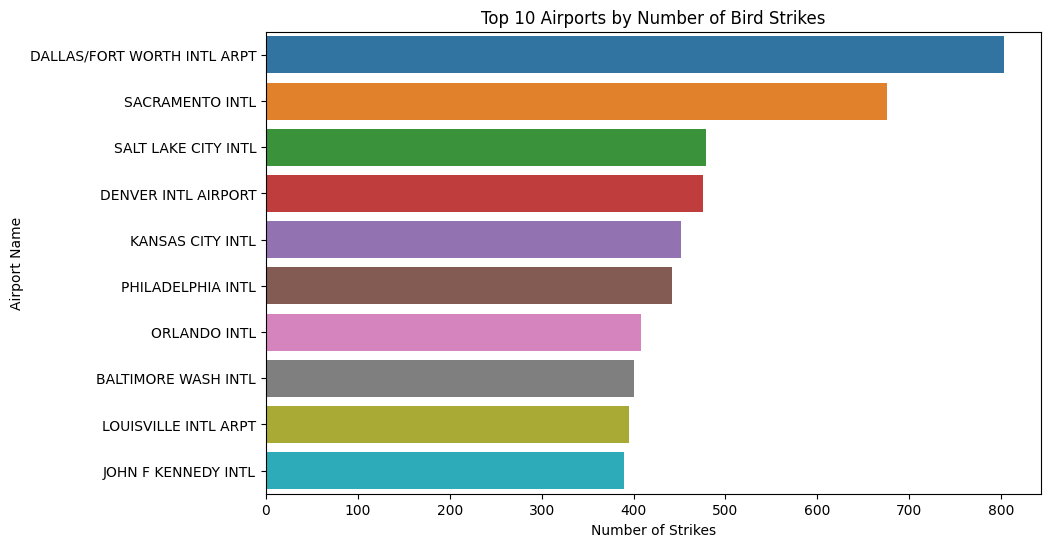

In [13]:
strikes_by_airport = bird_strikes_data_df['airport_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=strikes_by_airport.values, y=strikes_by_airport.index)
plt.title('Top 10 Airports by Number of Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('Airport Name')
plt.show()

In [14]:
bird_strikes_data_df.isnull().sum()

record_id                                      0
aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make/model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23480
flightdate                                   129
effect_indicated_damage                        0
aircraft_number_of_engines?                  267
aircraft_airline/operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23543
remains_of_wildlife_collected?                 0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species    

In [15]:
print(bird_strikes_data_df.columns)

Index(['record_id', 'aircraft_type', 'airport_name', 'altitude_bin',
       'aircraft_make/model', 'wildlife_number_struck',
       'wildlife_number_struck_actual', 'effect_impact_to_flight',
       'flightdate', 'effect_indicated_damage', 'aircraft_number_of_engines?',
       'aircraft_airline/operator', 'origin_state', 'when_phase_of_flight',
       'conditions_precipitation', 'remains_of_wildlife_collected?',
       'remains_of_wildlife_sent_to_smithsonian', 'remarks', 'wildlife_size',
       'conditions_sky', 'wildlife_species',
       'pilot_warned_of_birds_or_wildlife?', 'cost_total_$',
       'feet_above_ground', 'number_of_people_injured', 'is_aircraft_large?'],
      dtype='object')


In [16]:
bird_strikes_data_df['origin_state'].unique()

array(['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', nan,
       'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois',
       'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona',
       'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey',
       'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin',
       'Michigan', 'Massachusetts', 'Alaska', 'North Carolina',
       'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire',
       'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Quebec',
       'Idaho', 'British Columbia', 'Utah', 'Nebraska', 'Iowa',
       'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota',
       'Vermont', 'Wyoming', 'Kansas', 'Prince Edward Island', 'Montana',
       'Puerto Rico', 'Ontario', 'Virgin Islands',
       'Newfoundland and Labrador', 'Alberta', 'Saskatchewan'],
      dtype=object)

In [17]:
bird_strikes_data_df['remarks'].unique()

array(['FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN TYPE. #1 ENG WAS SHUT DOWN AND DIVERTED TO EWR. SLIGHT VIBRATION. A/C WAS OUT OF SVC FOR REPAIRS TO COWLING, FAN DUCT ACCOUSTIC PANEL. INGESTION. DENTED FAN BLADE #26 IN #1 ENG. HEAVY BLOOD STAINS ON L WINGTIP',
       '102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR WAS DAMAGED AND REPLACED.',
       'FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER APCH END OF RWY. NO DMG. JUST A LOT OF BIRD DROPPINGS ON WINDSCREEN.',
       ...,
       'STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD AS BROWN/WHITE. TWY.',
       'PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L BTWN TWY F & J. NO REMAINS FOUND ON RWY OR ON A/C. NO DMG TO A/C.',
       'HIT CENTER OF RADOME, CAVING IN ABOUT 12". RADOME WAS REPLACED. CARCASS FOUND IN SAFETY ARA ON RT SIDE OF RWY 22 AT INTXN OF RWY 18/36.'],
      dtype=object)

In [18]:
bird_strikes_data_df['when_phase_of_flight'].unique()

array(['Climb', 'Landing Roll', 'Approach', 'Take-off run', 'Descent',
       nan, 'Taxi', 'Parked'], dtype=object)

In [19]:
bird_strikes_data_df.dropna(subset=['aircraft_type', 'airport_name', 'altitude_bin',
       'aircraft_make/model', 'wildlife_number_struck',
       'wildlife_number_struck_actual', 'effect_impact_to_flight',
       'flightdate', 'effect_indicated_damage', 'aircraft_number_of_engines?',
       'aircraft_airline/operator', 'origin_state', 'when_phase_of_flight',
       'conditions_precipitation', 'remains_of_wildlife_collected?',
       'remains_of_wildlife_sent_to_smithsonian', 'remarks', 'wildlife_size',
       'conditions_sky', 'wildlife_species',
       'pilot_warned_of_birds_or_wildlife?', 'cost_total_$',
       'feet_above_ground', 'number_of_people_injured', 'is_aircraft_large?'],inplace=True)

In [20]:
bird_strikes_data_df.isnull().sum()

record_id                                  0
aircraft_type                              0
airport_name                               0
altitude_bin                               0
aircraft_make/model                        0
wildlife_number_struck                     0
wildlife_number_struck_actual              0
effect_impact_to_flight                    0
flightdate                                 0
effect_indicated_damage                    0
aircraft_number_of_engines?                0
aircraft_airline/operator                  0
origin_state                               0
when_phase_of_flight                       0
conditions_precipitation                   0
remains_of_wildlife_collected?             0
remains_of_wildlife_sent_to_smithsonian    0
remarks                                    0
wildlife_size                              0
conditions_sky                             0
wildlife_species                           0
pilot_warned_of_birds_or_wildlife?         0
cost_total

In [21]:
bird_strikes_data_df.to_csv('C:\\Users\\Lenovo\\Downloads\\Bird Strikes data.csv' ,index = False)